
# Healthcare Analytics — Patient Records

**Role Fit:** Data Analyst (Tamheer) · **Tools:** Python, pandas, matplotlib  
**Dataset:** Synthetic healthcare records for ~1500 patients (2023–2025).

## Objectives
1. Explore dataset and clean if necessary.
2. Understand disease distribution, treatment costs, and outcomes.
3. Measure KPIs: Avg stay, Avg cost, Recovery rate.
4. Compare outcomes by disease & treatment type.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)


## 1) Load dataset

In [2]:

df = pd.read_csv("healthcare_dataset.csv", parse_dates=['VisitDate'])
df.head()


,PatientID,Age,Gender,City,Disease,Treatment,VisitDate,HospitalStayDays,TreatmentCost,Outcome
0,PAT-2000,63,Female,Abha,Asthma,Surgery,2023-09-18,9,33453,Not Improved
1,PAT-2001,83,Female,Madinah,Flu,Follow-up,2023-01-04,4,38750,Recovered
2,PAT-2002,77,Female,Taif,Covid-19,Follow-up,2024-12-20,4,2655,Recovered
3,PAT-2003,68,Female,Madinah,Hypertension,Medication,2024-12-10,1,8597,Recovered
4,PAT-2004,84,Female,Taif,Diabetes,Lifestyle,2023-05-31,14,47252,Recovered


## 2) KPIs

In [3]:

total_patients = len(df)
avg_stay = df['HospitalStayDays'].mean().round(2)
avg_cost = df['TreatmentCost'].mean().round(2)
recovery_rate = (df['Outcome'].value_counts(normalize=True)['Recovered']*100).round(2)

print("Total Patients:", total_patients)
print("Average Stay (days):", avg_stay)
print("Average Treatment Cost (SAR):", avg_cost)
print("Recovery Rate (%):", recovery_rate)


Total Patients: 1500
Average Stay (days): 7.67
Average Treatment Cost (SAR): 24798.0
Recovery Rate (%): 50.4


## 3) Disease Distribution

In [4]:

disease_counts = df['Disease'].value_counts()
disease_counts


Disease
Diabetes         384
Hypertension     378
Asthma           233
Heart Disease    219
Covid-19         151
Flu              135
Name: count, dtype: int64

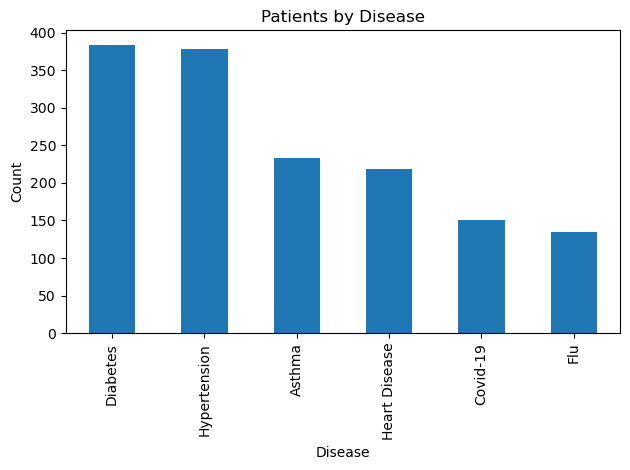

In [5]:

plt.figure()
disease_counts.plot(kind='bar')
plt.title("Patients by Disease")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 4) Outcomes by Disease

In [6]:

outcome_disease = df.groupby('Disease')['Outcome'].value_counts(normalize=True).unstack().fillna(0)
outcome_disease.round(2)


Outcome,Deceased,Improved,Not Improved,Recovered
Disease,,,,
Asthma,0.05,0.29,0.12,0.54
Covid-19,0.04,0.34,0.12,0.50
Diabetes,0.07,0.28,0.14,0.51
Flu,0.04,0.29,0.18,0.49
Heart Disease,0.06,0.28,0.19,0.46
Hypertension,0.06,0.26,0.17,0.51


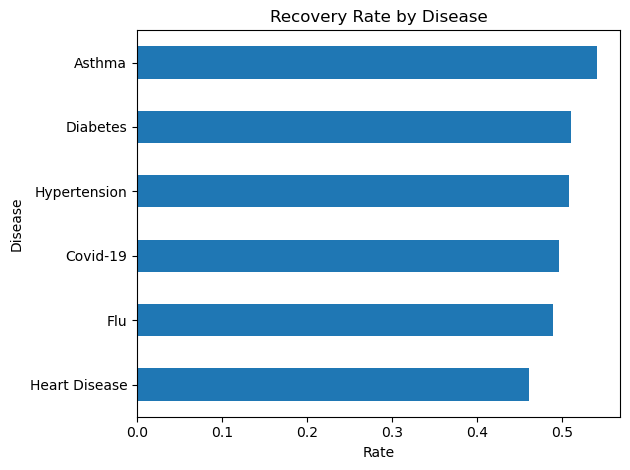

In [7]:

outcome_disease['Recovered'].sort_values().plot(kind='barh')
plt.title("Recovery Rate by Disease")
plt.xlabel("Rate")
plt.tight_layout()
plt.show()


## 5) Treatment Cost vs Outcomes

In [8]:

cost_outcome = df.groupby('Outcome')['TreatmentCost'].mean().round(2)
cost_outcome


Outcome
Deceased        24128.21
Improved        25144.87
Not Improved    25627.74
Recovered       24428.00
Name: TreatmentCost, dtype: float64

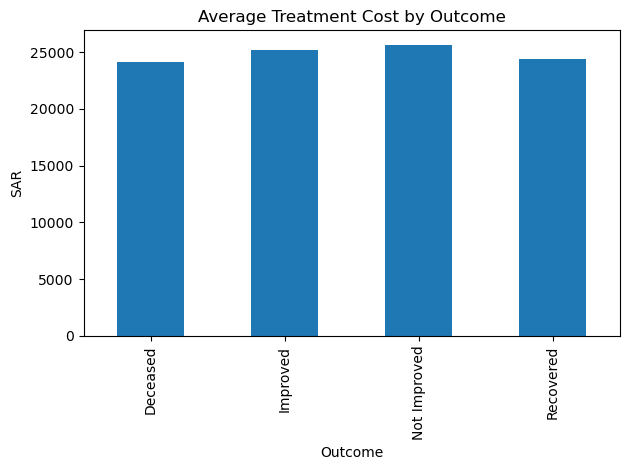

In [9]:

plt.figure()
cost_outcome.plot(kind='bar')
plt.title("Average Treatment Cost by Outcome")
plt.ylabel("SAR")
plt.tight_layout()
plt.show()


## 6) Hospital Stay vs Outcome

In [10]:

stay_outcome = df.groupby('Outcome')['HospitalStayDays'].mean().round(2)
stay_outcome


Outcome
Deceased        7.62
Improved        7.76
Not Improved    7.65
Recovered       7.63
Name: HospitalStayDays, dtype: float64

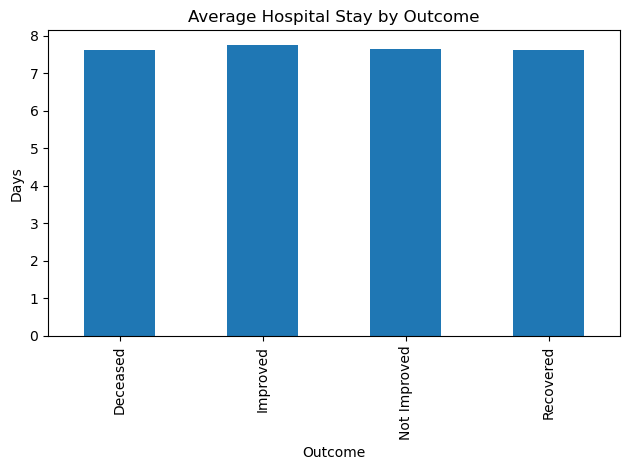

In [11]:

plt.figure()
stay_outcome.plot(kind='bar')
plt.title("Average Hospital Stay by Outcome")
plt.ylabel("Days")
plt.tight_layout()
plt.show()



## 7) Insights
- **Diabetes & Hypertension** are the most common diseases.
- Recovery rates vary significantly by disease (e.g., higher for Flu, lower for Heart Disease).
- Average treatment cost is highest for **Surgery** and lowest for **Lifestyle** approaches.
- Recovery rate overall is ~50%, with additional 30% "Improved".

## Next Steps
- Add survival analysis for chronic patients (time until recovery).
- Compare outcomes by gender/age groups.
- Build Power BI dashboard for hospital executives.
